In [3]:
import pandas as pd
file_path = 'HW1_Microsoft.xlsx'
df = pd.read_excel(file_path)
print(df.head())

         Date   Close
0  01/03/2023  239.58
1  01/04/2023  229.10
2  01/05/2023  222.31
3  01/06/2023  224.93
4  01/09/2023  227.12


In [5]:
print(df.columns)

Index(['Date', 'Close'], dtype='object')


In [7]:
print(df.columns)
closing_price = df['Close'] 

mean_price = closing_price.mean()
median_price = closing_price.median()
std_dev = closing_price.std()
min_price = closing_price.min()
max_price = closing_price.max()
summary = closing_price.describe()
print("Mean:", mean_price)
print("Median:", median_price)
print("Standard Deviation:", std_dev)
print("Min:", min_price)
print("Max:", max_price)
print("\nFull Summary:")

print(summary)

Index(['Date', 'Close'], dtype='object')
Mean: 313.951
Median: 324.65
Standard Deviation: 40.97585774908308
Min: 222.31
Max: 382.7

Full Summary:
count    250.000000
mean     313.951000
std       40.975858
min      222.310000
25%      282.995000
50%      324.650000
75%      337.897500
max      382.700000
Name: Close, dtype: float64


In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

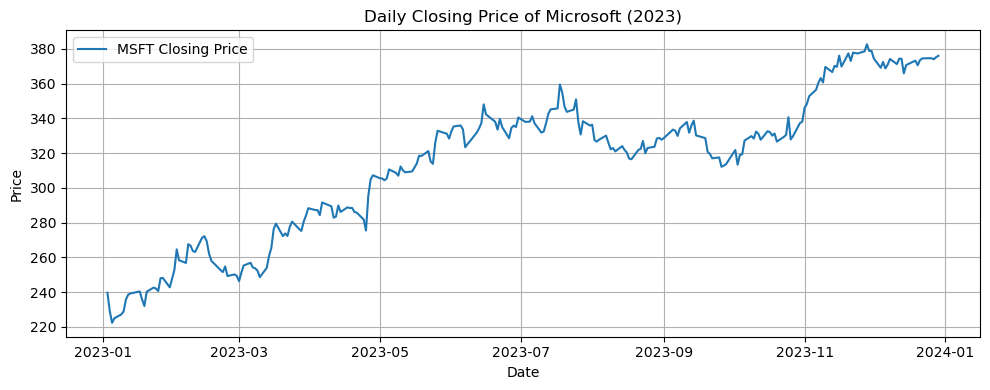

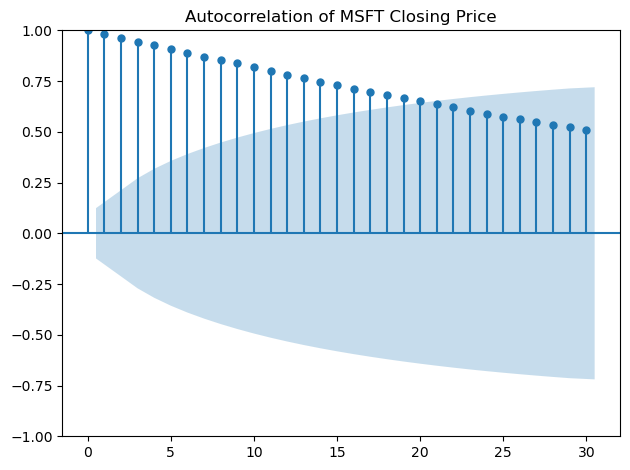

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='MSFT Closing Price')
plt.title('Daily Closing Price of Microsoft (2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plot_acf(df['Close'], lags=30)
plt.title('Autocorrelation of MSFT Closing Price')
plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.stattools import acf

In [23]:
acf_values = acf(closing_price, nlags=30)

In [25]:
acf_values = acf(closing_price, nlags=30)
for lag, value in enumerate(acf_values):
    print(f"Lag {lag}: {value:.4f}")

Lag 0: 1.0000
Lag 1: 0.9819
Lag 2: 0.9626
Lag 3: 0.9438
Lag 4: 0.9254
Lag 5: 0.9064
Lag 6: 0.8870
Lag 7: 0.8704
Lag 8: 0.8536
Lag 9: 0.8370
Lag 10: 0.8192
Lag 11: 0.8006
Lag 12: 0.7817
Lag 13: 0.7641
Lag 14: 0.7463
Lag 15: 0.7283
Lag 16: 0.7117
Lag 17: 0.6965
Lag 18: 0.6813
Lag 19: 0.6654
Lag 20: 0.6511
Lag 21: 0.6363
Lag 22: 0.6216
Lag 23: 0.6044
Lag 24: 0.5885
Lag 25: 0.5752
Lag 26: 0.5608
Lag 27: 0.5467
Lag 28: 0.5329
Lag 29: 0.5224
Lag 30: 0.5099


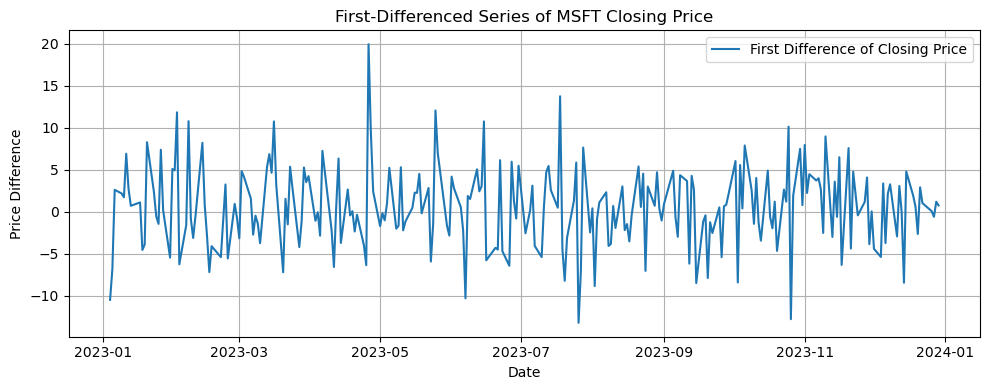

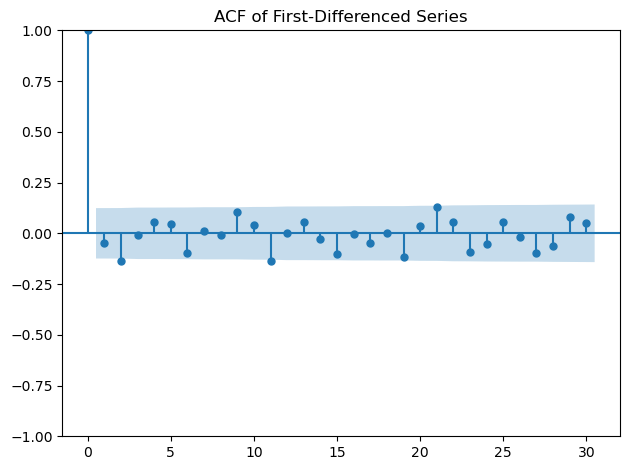

ADF Statistic: -13.323335540719908
p-value: 6.3935960498877e-25
Critical Value (1%): -3.4571
Critical Value (5%): -2.8733
Critical Value (10%): -2.5730


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

file_path = 'HW1_Microsoft.xlsx'
df = pd.read_excel(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df['Diff'] = df['Close'].diff().dropna()

plt.figure(figsize=(10, 4))
plt.plot(df['Diff'], label='First Difference of Closing Price')
plt.title('First-Differenced Series of MSFT Closing Price')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

plot_acf(df['Diff'].dropna(), lags=30)
plt.title('ACF of First-Differenced Series')
plt.tight_layout()
plt.show()

adf_result = adfuller(df['Diff'].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value:.4f}")